In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone
from matplotlib.colors import ListedColormap



In [2]:
chips_data = pd.read_csv("./data/chips.csv", header=None)[1:].sample(frac=1)
chips_X = np.array(chips_data.loc[:, 0:1], dtype=np.float)
chips_y = np.where(chips_data.loc[:, 2] == 'P', 1, -1).astype(np.int8)

In [3]:
geyser_data = pd.read_csv("./data/geyser.csv", header=None)[1:].sample(frac=1)
geyser_X = np.array(geyser_data.loc[:, 0:1], dtype=np.float)
geyser_y = np.where(geyser_data.loc[:, 2] == 'P', 1, -1).astype(np.int8)

In [4]:
class CustomClassifier:
    def __init__(self, H, alpha):
        self.alpha = alpha
        self.H = H

    def predict(self, X):
        pred = np.empty((X.shape[0], 0))
        for h in self.H:
            pred = np.append(pred, h.predict(X).reshape((-1, 1)), axis=1)
        return np.sign((self.alpha * pred).sum(axis=1))

    def score(self, X, y):
        return (self.predict(X) == y).sum()/y.size

In [5]:
def ada_boost(clf, X_train, y_train, T):
    D = np.full(y_train.size, 1/y_train.size)
    H = []
    alpha = np.array([])

    for t in range(T):
        h_t = clone(clf).fit(X_train, y_train, sample_weight=D)
        pred = h_t.predict(X_train)
        err = (D * (pred != y_train)).sum()

        a_t = .5 * np.log((1 - err)/(err + 1/y_train.size))
        H.append(h_t)
        alpha = np.append(alpha, a_t)

        D = D * np.exp(-a_t * y_train * pred)
        D = D/D.sum()

    return CustomClassifier(H, alpha)

In [6]:
def test(X_train, y_train, X_test, y_test, depths=range(1, 2)):
    plt.figure(dpi=200)
    for depth in depths:
        accuracies = []
        for T in [1, 2, 3, 5, 8, 13, 21, 34, 55]:
            accuracies.append(ada_boost(DecisionTreeClassifier(max_depth=depth) ,X_train, y_train, T).score(X_test, y_test))
        plt.plot([1, 2, 3, 5, 8, 13, 21, 34, 55], accuracies, label='depth = %d' % depth)
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.), ncol=2)
    plt.ylabel('accuracy')
    plt.ylim((0,1.1))
    plt.xlabel('T - шаг бустинга')
    plt.show()

In [7]:
def visualize(X_train, y_train, X_test, y_test, depths=range(1, 2)):
    for depth in depths:
        accuracies = []
        fig, axs = plt.subplots(3, 3,figsize=(19, 10), dpi=200)
        i = 0
        fig.suptitle('Depth %d' % depth)
        for T in [1, 2, 3, 5, 8, 13, 21, 34, 55]:
            clf = ada_boost(DecisionTreeClassifier(max_depth=depth) ,X_train, y_train, T)
            X = np.append(X_train, X_test, axis=0)
            y = np.append(y_train, y_test, axis=0)
            xx, yy = np.meshgrid(np.linspace(X[:,0].min() - 1, X[:,0].max() + 1, 1000), np.linspace(X[:,1].min() - 1, X[:,1].max() + 1, 1000))
            pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
            pred = pred.reshape(xx.shape)
            axs[i//3][i%3].set_title('T: %d | accuracy: %0.2f' % (T, clf.score(X_test, y_test)))
            axs[i//3][i%3].pcolormesh(xx, yy, pred, cmap=ListedColormap(['#AAAAFF','#FFAFAF']))
            axs[i//3][i%3].scatter(X[:,0], X[:,1], c=y)
            i += 1
            
        fig.suptitle('depth: %d' % depth)

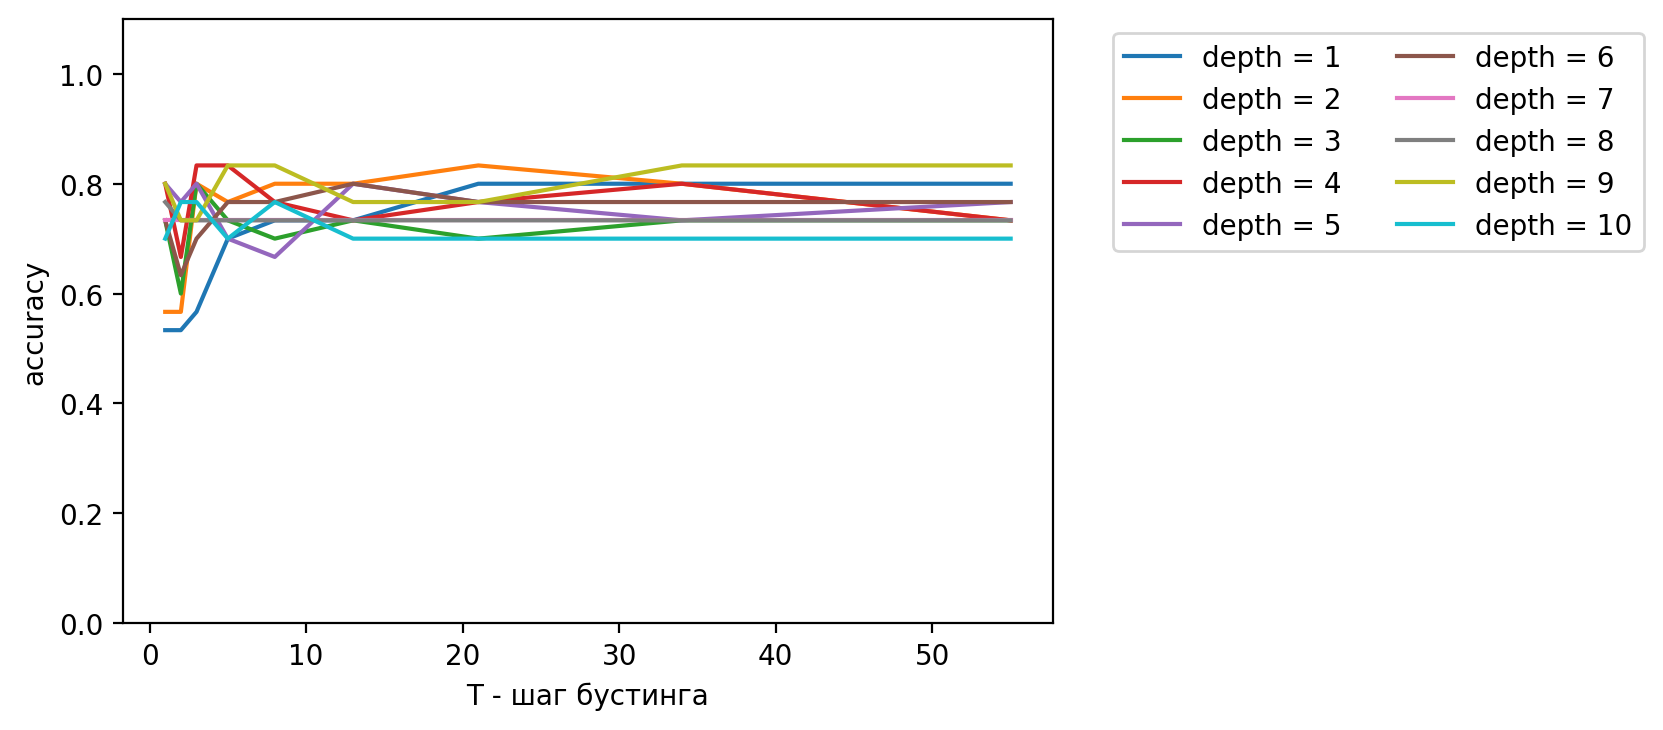

In [8]:
sep = int(chips_y.size*.75)
test(chips_X[:sep], chips_y[:sep], chips_X[sep:], chips_y[sep:], range(1, 11))

<ipython-input-7-9f931c530b3a>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[i//3][i%3].pcolormesh(xx, yy, pred, cmap=ListedColormap(['#AAAAFF','#FFAFAF']))
<ipython-input-7-9f931c530b3a>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[i//3][i%3].pcolormesh(xx, yy, pred, cmap=ListedColormap(['#AAAAFF','#FFAFAF']))
<ipython-input-7-9f931c530b3a>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprec

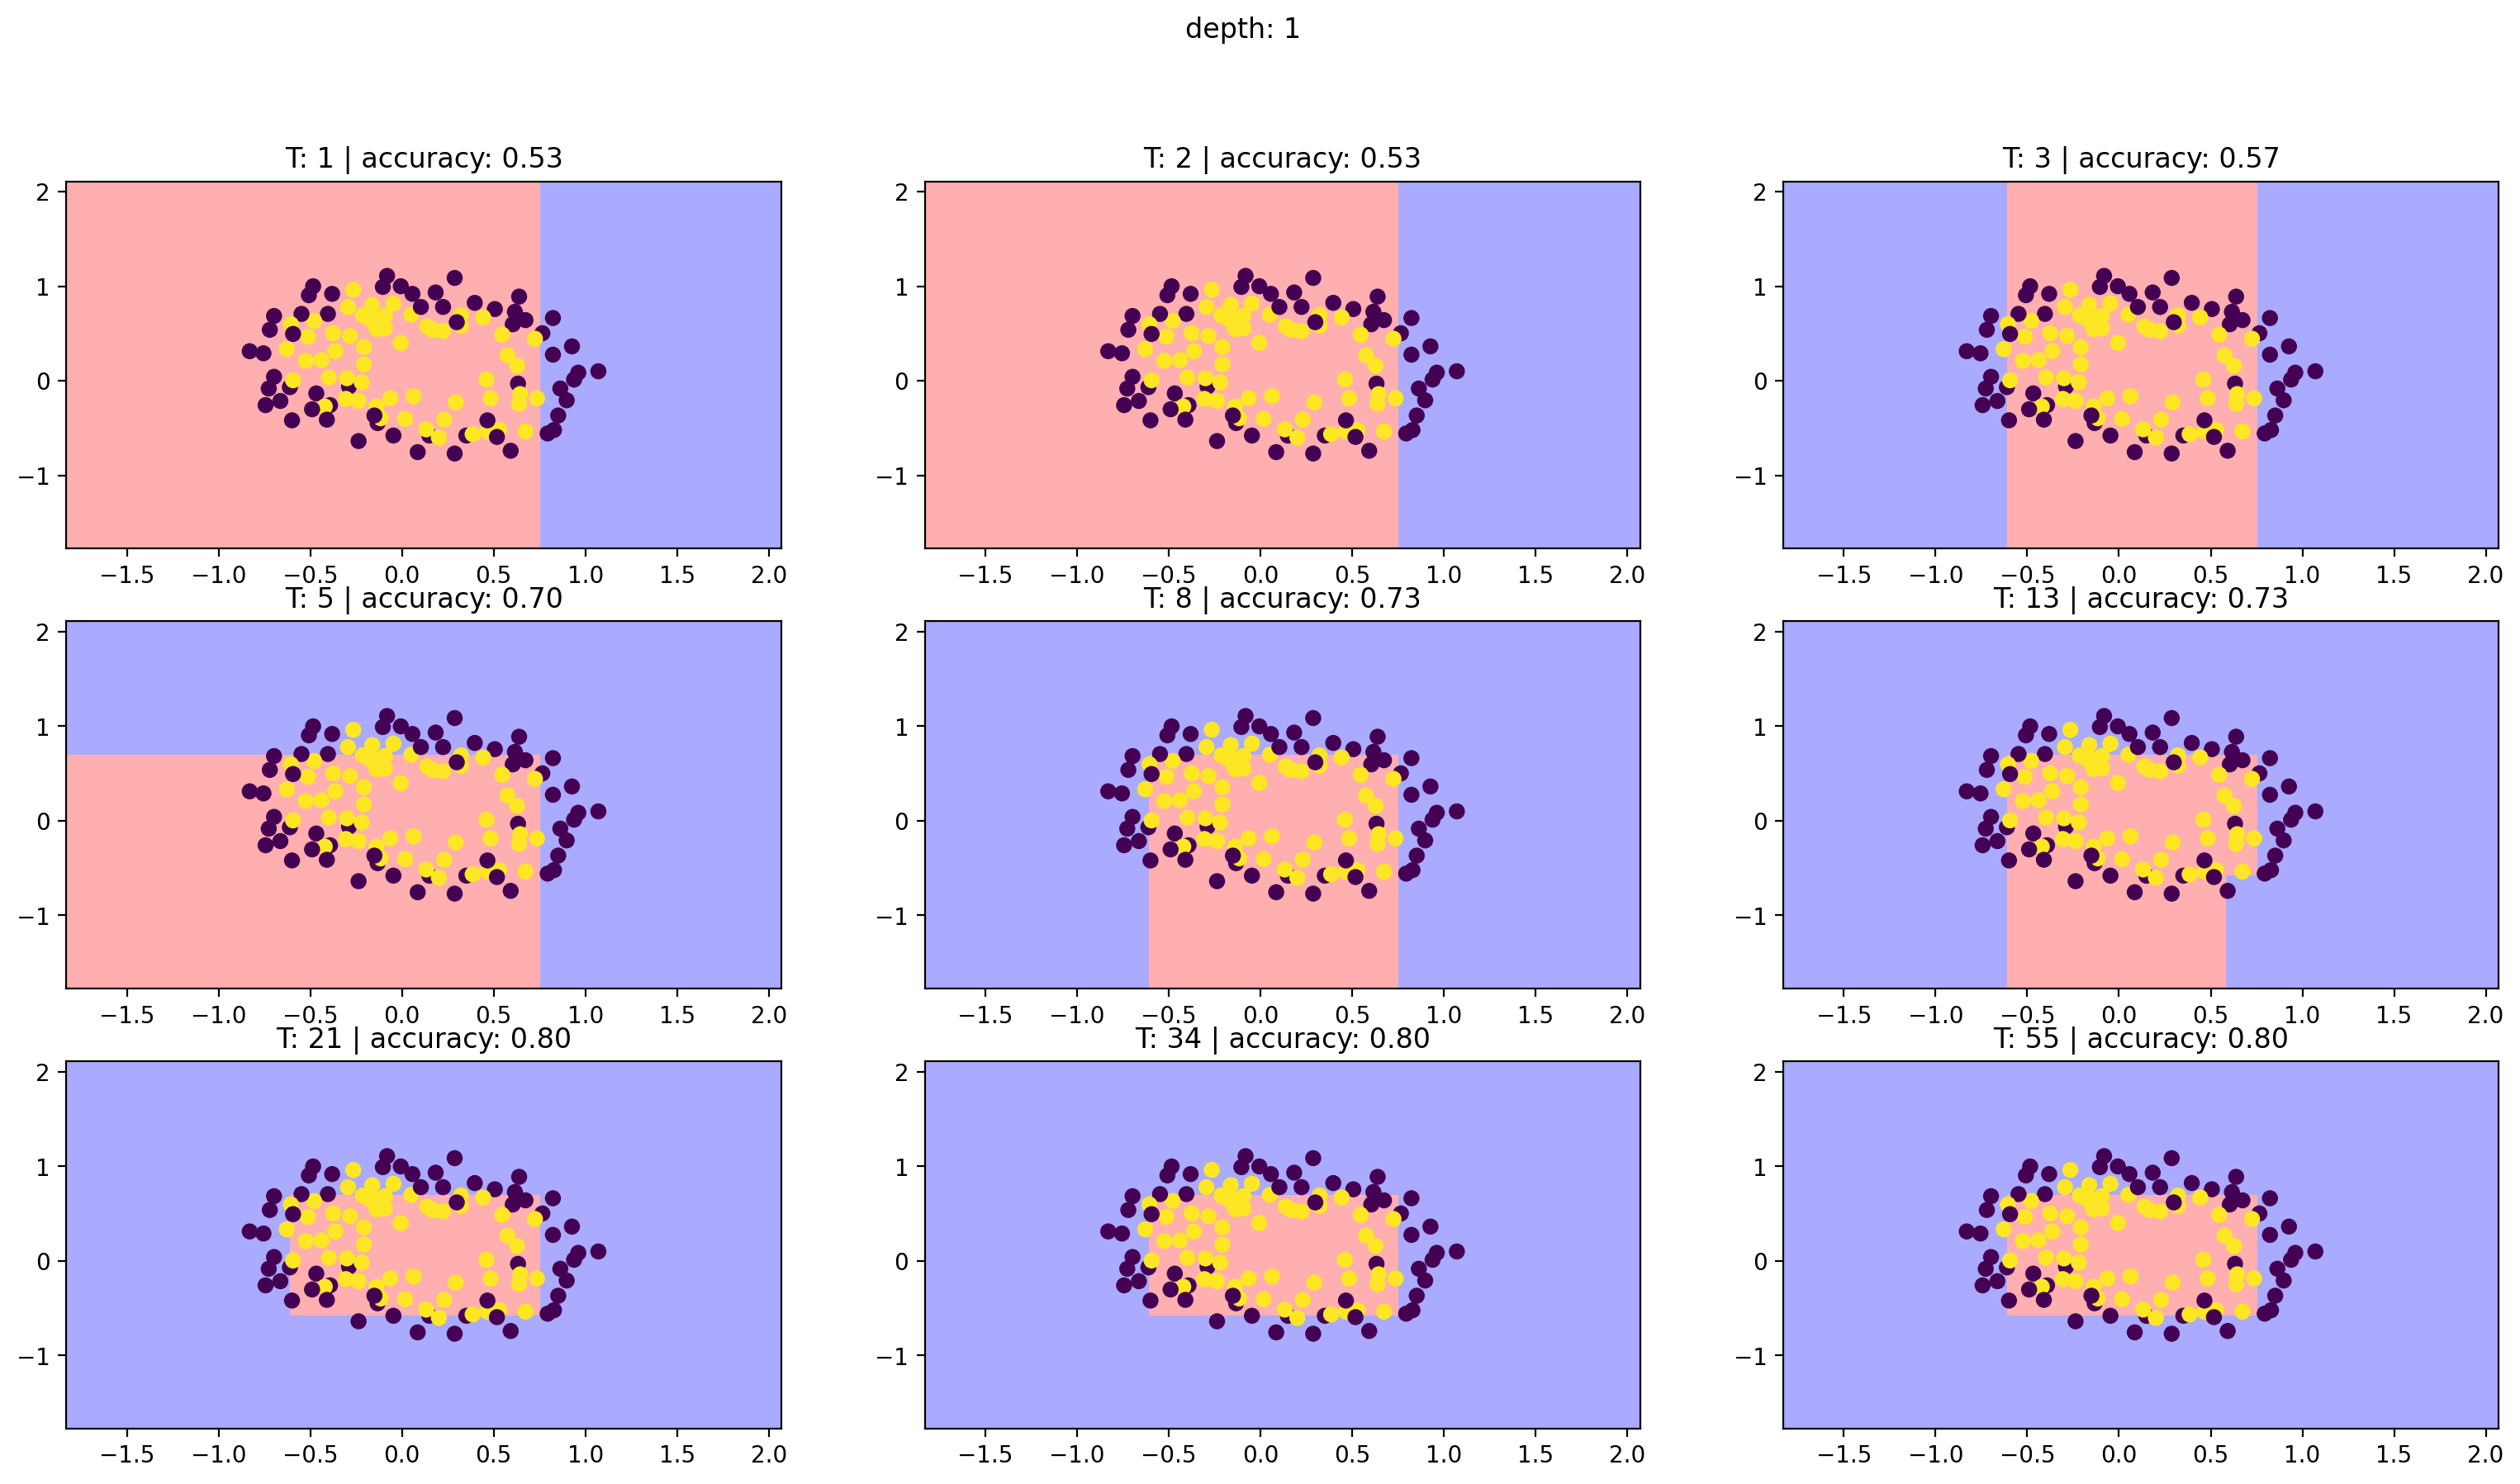

In [9]:
sep = int(chips_y.size*.75)
visualize(chips_X[:sep], chips_y[:sep], chips_X[sep:], chips_y[sep:], range(1, 2))

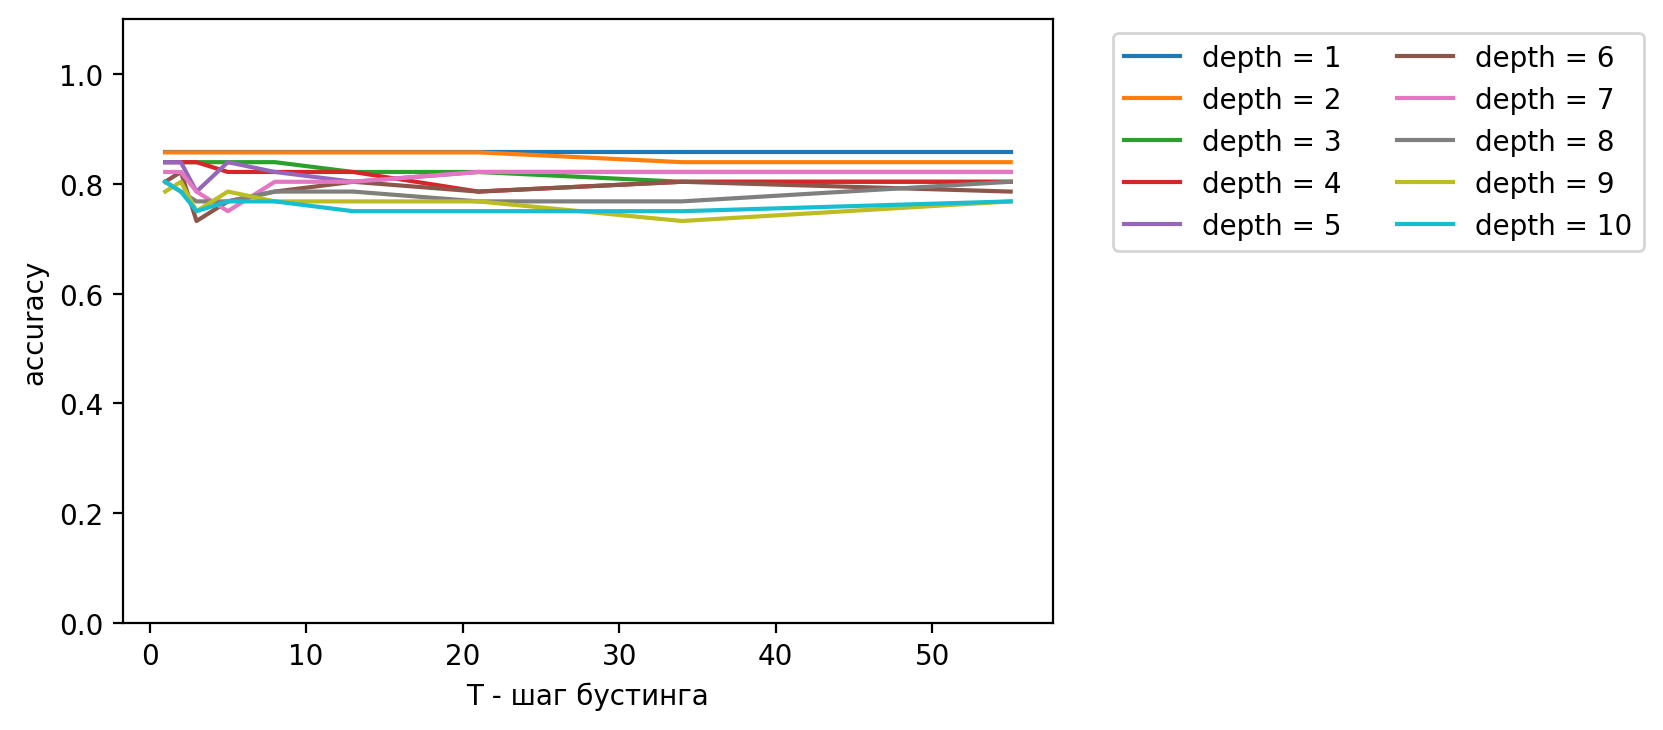

In [10]:
sep = int(geyser_y.size*.75)
test(geyser_X[:sep], geyser_y[:sep], geyser_X[sep:], geyser_y[sep:], range(1, 11))

<ipython-input-7-9f931c530b3a>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[i//3][i%3].pcolormesh(xx, yy, pred, cmap=ListedColormap(['#AAAAFF','#FFAFAF']))
<ipython-input-7-9f931c530b3a>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axs[i//3][i%3].pcolormesh(xx, yy, pred, cmap=ListedColormap(['#AAAAFF','#FFAFAF']))
<ipython-input-7-9f931c530b3a>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprec

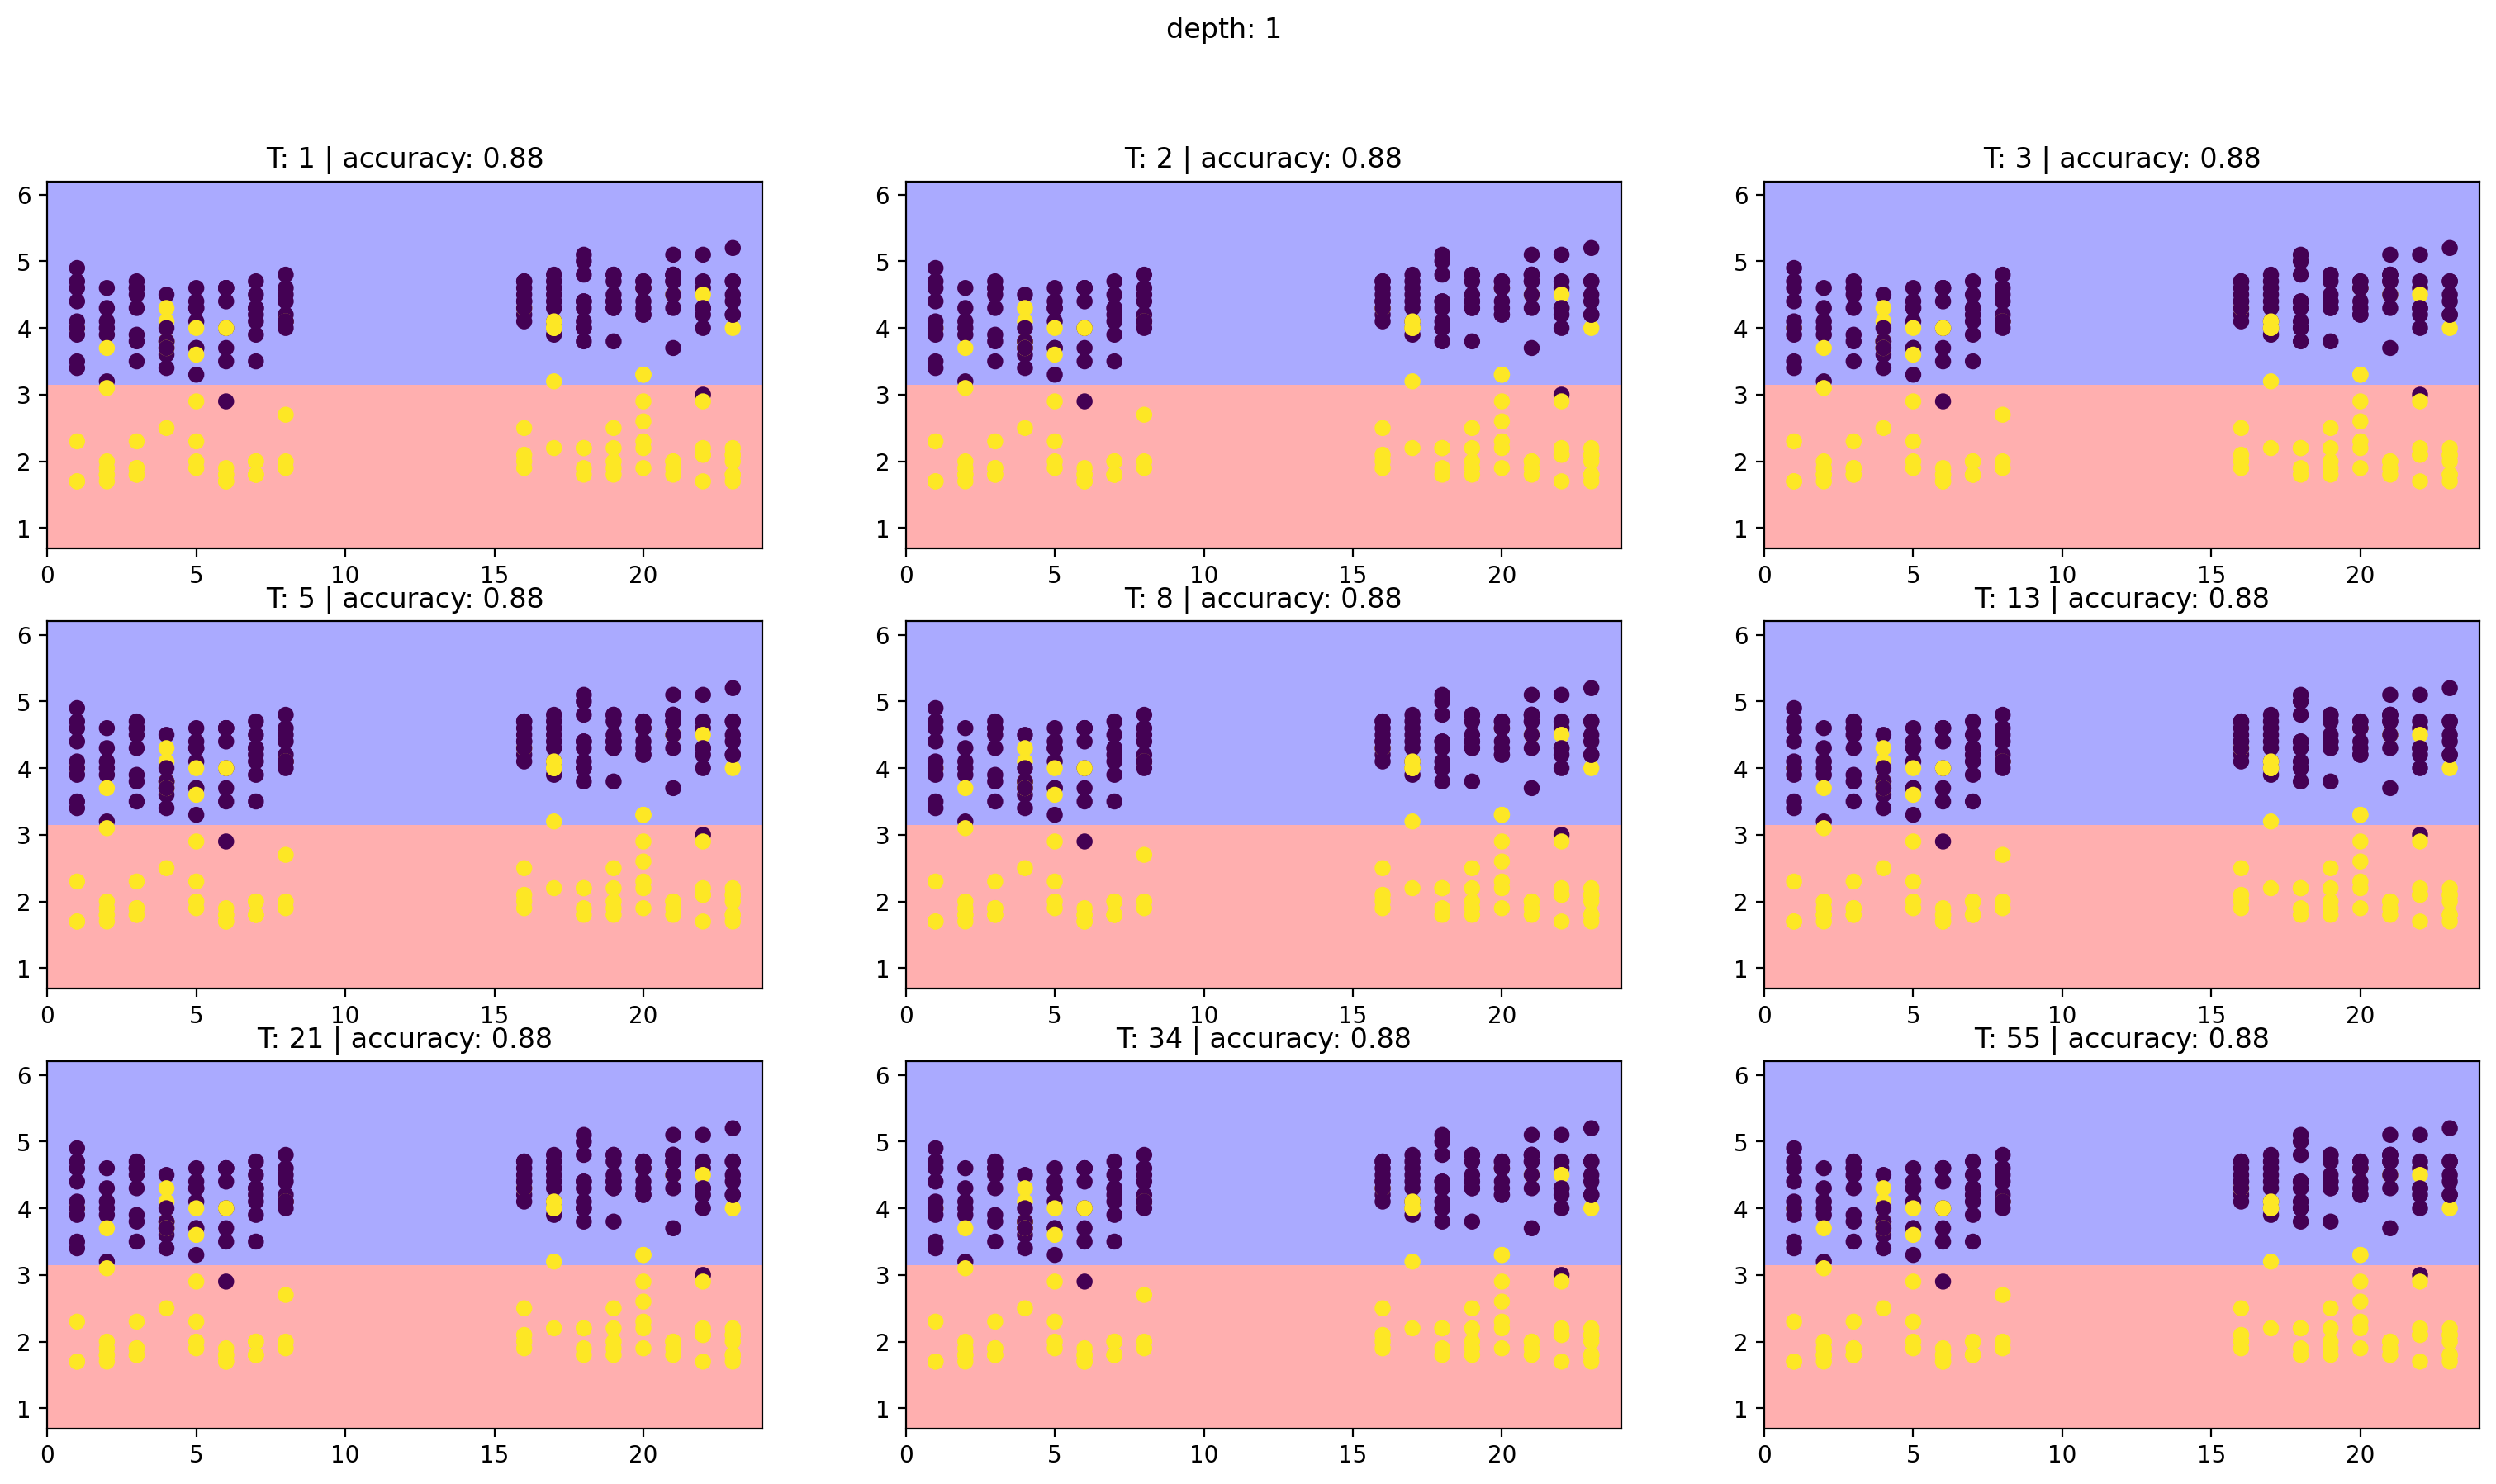

In [11]:
sep = int(chips_y.size*.75)
visualize(geyser_X[:sep], geyser_y[:sep], geyser_X[sep:], geyser_y[sep:], range(1, 2))